# COGS 188 - Final Project

# Optimizing Stock Market Trading Strategies: A Comparative Analysis

## Group members

- Brooks Ephraim
- Elan Hashem
- Bram Simonnet

# Abstract 
Our project explores AI-driven algorithmic trading strategies to optimize portfolio performance by predicting market trends and making informed trading decisions. We use historical stock data, including price movements, trading volume, and technical indicators, to develop predictive models. Our approach incorporates Neural Networks (NN), Temporal Difference (TD) Learning, and Dynamic Programming (DP) to forecast price changes and execute optimal trades. We evaluate model performance using financial metrics such as the Sharpe Ratio, total return, and average prediction error, comparing AI-driven strategies against the traditional Buy and Hold (BH) approach. Our results show that while BH outperforms most rule-based strategies in stable conditions, optimized AI models can generate higher portfolio returns when hyperparameters like train/test split and trade thresholds are tuned effectively. This study highlights the potential of AI in financial markets while acknowledging the important challenges of market volatility and overfitting.

# Background (STILL NEED TO CHANGE)

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 3 to 5 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Financial markets are inherently volatile, making it challenging to develop trading strategies that consistently outperform traditional approaches while managing risk. Initially, our goal was to maximize trading opportunities, but our focus developed towards predicting market trends and making informed trading decisions based on those predictions. This project integrates machine learning techniques, including Temporal Difference (TD) learning, Dynamic Programming (DP), and Neural Networks (NN), to optimize portfolio performance. By leveraging historical market data, we train models to predict price movements and identify optimal buy/sell points through backtracking and reinforcement learning principles. The effectiveness of our strategies is measured using key financial metrics such as the Sharpe ratio, total return, and prediction error. We benchmark our models against the Buy and Hold strategy to evaluate performance across different time periods and market conditions. Through hyperparameter tuning and company-wide analysis, we refine our models to maximize profitability while mitigating risk, ensuring adaptability in dynamic financial environments.

# Data

### **Source and Structure**
Our dataset was obtained from Yahoo Finance via the [Massive Yahoo Finance Dataset](https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset) on Kaggle. It includes historical stock data for multiple companies, spanning several years, with daily and minute-level price observations.

Each row in the dataset represents a timestamped stock price entry, typically structured as follows:
- **Company**: Stock ticker symbol (e.g., AAPL, TSLA).
- **Date**: Timestamp for the recorded data.
- **Open, High, Low, Close Prices (OHLC)**: Standard stock price metrics.
- **Adjusted Close**: Adjusted for stock splits and dividends.
- **Volume**: The number of shares traded.

After cleaning and preprocessing, our final dataset contained over **600,000 observations**, with essential financial metrics used for strategy evaluation.

### **Data Cleaning and Preprocessing**
To ensure high-quality inputs for our models, we applied the following preprocessing steps:

#### **1. Handling Missing Data**
- Dropped rows with missing OHLC prices to maintain data integrity.
- Forward-filled missing values due to market closures on weekends and holidays.

#### **2. Feature Engineering**
To enhance model performance, we generated additional features:
- Returns Calculation: Daily percentage change in stock price:
  ```python
  
  df["Return"] = df.groupby("Company")["Close"].pct_change()
  ```
- **Price Indicators**:
  - Prev_Close: Closing price of the previous day.
  - Price Change**: Difference between current and previous close price.
  - Volatility: 5-day rolling standard deviation of closing prices.
- **Technical Indicators**:
  - **Simple Moving Averages (SMA)**:
    ```python
    df["SMA_10"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
    df["SMA_50"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=50, min_periods=1).mean())
    ```

#### **3. Data Transformation**
- Converted timestamps to `datetime` format for easier time-series processing.
- Sorted data by `Company` and `Date` to maintain chronological integrity.
- Normalized price data where necessary for reinforcement learning models.


## **Final Processed Dataset**
- Companies Tracked: Multiple (e.g., AAPL, TSLA).
- Observations: Over 600,000 records post-cleaning.
- **Key Features Used**:
  - OHLC prices
  - Volume
  - Returns
  - Moving Averages
  - Volatility

This cleaned dataset was then used to train and evaluate different trading strategies, including reinforcement learning models (TD Learning, Dynamic Programming) and benchmarking against Buy-and-Hold strategies.

# Proposed Solution
 
Our approach optimizes algorithmic trading strategies by integrating reinforcement learning (TD Learning) and Dynamic Programming (DP) to make data-driven trading decisions. Instead of relying solely on rule-based or traditional statistical models, we use machine learning techniques to predict market movements and execute optimal buy/sell strategies.  

##### **Problem Formulation: Trading as a Sequential Decision Process**
We model the trading problem using Temporal Difference Learning and Dynamic Programming to determine the best buy, sell, or hold decisions based on historical stock data. Our goal is to maximize portfolio returns by learning from past market movements and optimizing trade execution.

##### **1. State (S): Market Representation**
Each state represents the market at a given time and includes:  
- **OHLCV Data**: Open, High, Low, Close, Volume.  
- **Technical Indicators**: Moving Averages (SMA, EMA), Volatility, Relative Strength Index (RSI), MACD.  
- **Market Trends**: Rolling price changes, trend momentum.  
- **Portfolio Status**: Current holdings, cash balance, previous transactions.

##### **2. Actions (A): Trading Decisions**
At each time step, the algorithm decides between:  
- **Buy**: Purchase stock at the current price.  
- **Sell**: Sell stock at the current price.  
- **Hold**: Maintain the current position.

##### **3. Reward Function (R): Incentivizing Profitability**
- **Profit Maximization**: The reward function is defined as:

\[
R_t = P_{t+1} - P_t
\]

- **Transaction Costs**: Penalize excessive trading to minimize fees.  
- **Holding Time Penalty**: Discourage holding onto a losing position for too long.

##### **4. Dynamic Programming (DP) for Trade Optimization**
Once TD Learning generates price predictions, Dynamic Programming (DP) is used to backtrack from the final date to identify optimal buy/sell points. By systematically evaluating potential trading decisions over time, DP finds the most profitable trades across the entire prediction window, outperforming naïve strategies.

#### **Implementation Steps**
1. **Data Preprocessing**: Clean and engineer features from Yahoo Finance data.  
2. **TD Learning Prediction**: Train a reinforcement learning model on historical prices.  
3. **DP Optimization**: Apply Dynamic Programming to maximize profit using predicted prices.  
4. **Strategy Backtesting**: Compare TD+DP Trading Strategy against the Buy-and-Hold Benchmark using real stock market data.  
5. **Performance Evaluation**: Measure effectiveness using Sharpe Ratio, Total Return, and Drawdowns.

By combining machine learning, TD Learning, and Dynamic Programming, our approach enhances decision-making in trading and adapts dynamically to changing market conditions.

# Evaluation Metrics

To assess the effectiveness of our AI-driven trading strategies, we employ multiple evaluation metrics that measure profitability, risk management, and model performance. These metrics allow us to compare our Temporal Difference Learning and Dynamic Programming methods against traditional strategies like Buy & Hold and other benchmark models. Below, we outline the key evaluation criteria used in our analysis.

### **Profitability & Risk-Adjusted Returns**
**1. Sharpe Ratio**

The Sharpe Ratio is a fundamental measure in finance that evaluates the risk-adjusted return of an investment strategy. A higher Sharpe ratio indicates better returns per unit of risk, making it a critical metric for comparing our AI models to benchmarks.

Mathematically, the Sharpe Ratio is defined as:

Sharpe Ratio = (Rx – Rf) / StdDev Rx 
- Rx = Expected portfolio return 
- Rf = Risk-free rate of return. 
- StdDev Rx = Standard deviation of portfolio return (or, volatility)

```python
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = np.array(returns) - risk_free_rate  
    std_dev = np.std(excess_returns, ddof=1)  

    return np.inf if std_dev == 0 else np.mean(excess_returns) / std_dev
```

We use this ratio in BENCHMARK_EVAL.py to compare the Sharpe ratios of:
- Buy & Hold Strategy
- TD Learning Strategy
- DP Strategy
- Other benchmark strategies (e.g., SMA, EMA, MACD)

### Trading Strategies Evaluated
We implemented and backtested 8 different trading strategies:

| **Strategy** | **Description** |
|-------------|----------------|
| **Simple Moving Average (SMA)** | Uses short- and long-term moving averages for buy/sell signals. |
| **Exponential Moving Average (EMA)** | Similar to SMA but gives more weight to recent prices. |
| **Mean Reversion** | Buys undervalued stocks and sells overvalued ones based on deviation from SMA. |
| **Momentum Trading** | Rides trends by buying when prices increase and selling when they decrease. |
| **Moving Average Crossover (MAC)** | Combines SMA and momentum for trade signals. |
| **Scalping Strategy** | Executes quick trades on small price movements. |
| **Swing Trading** | Identifies medium-term price swings for entries/exits. |
| **Buy-and-Hold (Benchmark)** | Holds stocks long-term, serving as the **baseline** strategy. |

Each strategy applies a **buy/sell signal** based on different technical indicators, such as moving averages, price deviations, and momentum calculations.

Example of Simple Moving Average (SMA):

```python
df["SMA_Short"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df["SMA_Long"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(window=100, min_periods=1).mean())

df["SMA_Signal"] = 0
df.loc[df["SMA_Short"] > df["SMA_Long"], "SMA_Signal"] = 1  # Buy
df.loc[df["SMA_Short"] < df["SMA_Long"], "SMA_Signal"] = -1  # Sell
```
Each strategy was **backtested** by multiplying returns by its respective trading signals.



### Results: Sharpe Ratio Comparison
We computed Sharpe Ratios for each strategy to determine the most profitable and risk-efficient approach.

```python
print("Sharpe Ratios for Trading Strategies")
print(f" SMA Strategy Sharpe Ratio: {sma_sharpe:.4f}")
print(f" EMA Strategy Sharpe Ratio: {ema_sharpe:.4f}")
print(f" Mean Reversion Strategy Sharpe Ratio: {mean_reversion_sharpe:.4f}")
print(f" Momentum Strategy Sharpe Ratio: {momentum_sharpe:.4f}")
print(f" MAC Strategy Sharpe Ratio: {mac_sharpe:.4f}")
print(f" Scalping Strategy Sharpe Ratio: {scalping_sharpe:.4f}")
print(f" Swing Trading Strategy Sharpe Ratio: {swing_sharpe:.4f}")
print(f" Buy-and-Hold Strategy Sharpe Ratio: {buy_hold_sharpe:.4f}")
```

### **Model Performance & Prediction Accuracy**
**2. Average Prediction Error**

To evaluate our market prediction model, we measure the average prediction error, comparing:
- Predicted closing prices from TD Learning & DP
- Actual closing prices in the market.

This allows us to quantify how well our model forecasts market movements, impacting trade execution quality.

\[
Average Prediction Error = 1/N sum(t=1)^N | P{predicted} - P{actual} |
\]

where:
- P{predicted} = Predicted stock price at time t
- P{actual} = Actual stock price at time t
- N = Total number of observations

This measures the average absolute difference between the predicted and actual prices.



#### Interpreting APE Results
- Lower APE → Better predictions: Our model is accurately forecasting stock prices.
- Higher APE → Worse predictions: The model struggles to capture market trends.
- Comparison between models: If TD Learning has lower APE than DP, TD is better at forecasting.

#### Why is APE Important?
- Benchmarks the accuracy of AI-driven predictions.
- Guides model improvements (e.g., tuning hyperparameters).
- Validates whether AI models outperform traditional methods.

#### Python Implementation 

We implement this metric in **PARENT_AAPL.py**, where we apply TD Learning and DP models to predict stock prices.

```python

# --- Compute Average Prediction Error (APE) ---
def calculate_ape(actual_prices, predicted_prices):
    """
    Compute Average Prediction Error (APE)
    """
    errors = np.abs(actual_prices - predicted_prices)
    return np.mean(errors)

# Remove NaN values
valid_data = test_df.dropna(subset=["Predicted_Close"])
actual_prices = valid_data["Close"].values
predicted_prices = valid_data["Predicted_Close"].values

# Compute APE
average_prediction_error = calculate_ape(actual_prices, predicted_prices)

print(f" Average Prediction Error (APE): {average_prediction_error:.4f}")
```


### **Portfolio Performance Comparison**
**3. Portfolio Profitability**

To assess portfolio profitability, we compare TD & DP trading models against the Buy & Hold strategy over the same time period, using metrics such as:

**Total Return (%)**

\[
Total Return = [Final Portfolio Value - Initial Investment / Initial Investment] x 100
\]
- Higher total return = More profitable strategy  
<br>

**4. Weighted Average Performance: Evaluating Multiple Companies**  

In our study, we expand from analyzing a single stock (e.g., AAPL) to evaluating multiple companies to ensure our model's generalizability. To achieve this, we compute a weighted average performance metric across different stocks, ensuring that larger companies (with more significant market impact) are properly accounted for in our evaluation.

Why Use Weighted Averages?
A simple arithmetic mean would treat all stocks equally, which is unrealistic. Stocks with larger market capitalization or higher trading volume have a greater influence on the market and should carry more weight in our evaluation. 

To ensure fair comparison, we use a weighted average, where:
1. Portfolio returns are weighted based on the company’s trading volume or market capitalization.
2. Larger companies contribute more to the final metric, aligning with real-world financial analysis.
<br>
<br>

**Mathematical Representation**
<br>

We compute the weighted portfolio return using the formula:

\[
Weighted Average Return = [ (sum_{i=1}^{N} w_i R_i) / sum_{i=1}^{N}w_i ]
\]

where:
- \( R_i \) = Return for company \( i \)  
- \( w_i \) = Weight assigned to company \( i \) (based on trading volume or market cap)  
- \( N \) = Total number of companies  

This ensures that a high-volume stock like AAPL influences the average more than a low-volume stock.
<br>
<br>

**Implementation in Code**

We implement this approach in **AVG_COMPANY.py**, where we compute weighted performance across multiple stocks.

```python
# Compute daily returns
df["Return"] = df.groupby("Company")["Close"].pct_change()
df = df.dropna(subset=["Return"])  # Drop missing returns

# Define weights based on trading volume (alternative: use market cap)
df["Weight"] = df.groupby("Company")["Volume"].transform(lambda x: x / x.sum())

# Compute weighted returns for each strategy
df["Weighted_Return"] = df["Weight"] * df["Return"]

# Compute weighted Sharpe Ratio
def calculate_weighted_sharpe(df, risk_free_rate=0.01):
    weighted_avg_return = df["Weighted_Return"].mean()
    std_dev = df["Weighted_Return"].std()

    return np.inf if std_dev == 0 else (weighted_avg_return - risk_free_rate) / std_dev

# Compute weighted portfolio Sharpe ratio
weighted_sharpe = calculate_weighted_sharpe(df)

print(f"Weighted Portfolio Sharpe Ratio: {weighted_sharpe:.4f}")
```
<br>
Key Adjustments for Our Analysis

In **AVG_COMPANY.py**, we:
1. Weight returns based on trading volume to ensure large stocks influence results more.
2. Compute a weighted Sharpe Ratio, rather than treating each company equally.
3. Evaluate performance across an entire portfolio instead of just one stock.
<br>
<br>

Why Is This Important?
- Accounts for Real-World Market Influence: Large-cap stocks (like AAPL, TSLA) affect market trends more than small stocks.
- Ensures Stability in Results: A single company’s outlier performance doesn’t dominate the overall analysis.
- Improves Generalizability: Models trained on a diverse, weighted dataset are more robust.

This method ensures our AI trading model is tested fairly across multiple companies rather than overfitting to a single stock.


# Results

### 1. Analysis of the Dataset

**How Data Influenced Model Selection:**
- Initial exploration showed that stock prices followed trends, suggesting that momentum-based strategies (SMA, EMA) might be effective.
- However, Buy and Hold consistently outperformed simple rule-based strategies across different timeframes.
- This motivated us to explore reinforcement learning approaches:
  - Temporal Difference (TD) Learning to iteratively update value functions and predict various future values depending on train-test splits.
  - Dynamic Programming (DP) Strategy to optimize buy/sell decisions based on learned predictions.
- The dataset’s varying volatility across companies indicated that hyperparameter tuning would be critical to optimize strategy performance.

These insights guided our benchmark model selection and reinforcement learning approach, which we discuss next.


### 2. Benchmark Model Selection

**Choosing the Timeframe:**

To determine the best benchmark strategy, we analyzed performance across three different time periods:
1. Before COVID-19
2. After COVID-19
3. The entire timeline

Using **`TIMELINE.py`**, we computed the Sharpe Ratio for each strategy in all three periods. We found that:
- Buy and Hold outperformed all other strategies in every timeframe.
- This means timeframe selection had minimal impact on the best-performing benchmark.
- Thus, we used Buy and Hold as our benchmark for further comparisons.


**Sharpe Ratios for Trading Strategies**
- SMA Strategy Sharpe Ratio: -0.4684
- EMA Strategy Sharpe Ratio: -0.4612
- Mean Reversion Strategy Sharpe Ratio: -0.5731
- Momentum Strategy Sharpe Ratio: -0.4566
- MAC Strategy Sharpe Ratio: -0.6221
- Buy-and-Hold Strategy Sharpe Ratio: 0.3573


All trading strategies had negative Sharpe Ratios, indicating poor risk-adjusted performance.
- Buy and Hold had the highest Sharpe Ratio (0.3573), making it the clear benchmark strategy.

#### **Evaluation**

We implemented several trading strategies using Simple Moving Averages (SMA), Exponential Moving Averages (EMA), Momentum, and Mean Reversion, but none of them outperformed Buy and Hold.

**SMA**

The Simple Moving Average (SMA) is a widely used technical indicator in stock trading. It calculates the average of a stock's closing prices over a fixed number of past days, smoothing out fluctuations to reveal trends.

SMA is used to identify bullish or bearish trends:

- If a short-term SMA (e.g., 5-day) crosses above a long-term SMA (e.g., 100-day), it generates a buy signal (bullish crossover).
- If the short-term SMA drops below the long-term SMA, it generates a sell signal (bearish crossover).

**Why We Thought SMA Would Work Well**

- Clear Trend Identification: By smoothing out noise, SMA should help identify when to buy and sell.
- Widely Used: Many traders use SMA crossovers, so we expected it to have strong predictive power.
- Historical Support: In certain markets, SMA strategies have shown profitability in past studies.

However, despite our expectations, SMA underperformed significantly compared to Buy-and-Hold.

After implementing the SMA strategy and computing its Sharpe Ratio, we observed a negative Sharpe Ratio (-0.4684), indicating poor risk-adjusted returns.

**Reasons for SMA's Poor Performance**

**1. Delayed Reactions:**
- SMA is a lagging indicator, meaning it reacts slowly to price changes.
- This resulted in late buy/sell decisions, causing us to miss good entry/exit points.

**2. Frequent False Signals:**
- The market does not always follow clean trends, leading to whipsaws (false signals causing unnecessary trades).
- Increased trading meant higher transaction costs, further hurting performance.

**3. Market Trends Are Often Sustained:**
- The stock market generally follows long-term upward trends.
- SMA often forced unnecessary exits when the price briefly dipped, whereas Buy-and-Hold stayed invested and benefited from long-term gains.

After SMA failed, we tested Exponential Moving Average (EMA) and Moving Average Crossover with Momentum (MAC).
<br>
<br>

**Exponential Moving Average (EMA)**

EMA is similar to SMA but gives more weight to recent prices, making it more responsive to trends.

**Why EMA Should Have Worked**

- Faster Response to Trends: EMA adapts more quickly than SMA, potentially reducing lag.
- More Dynamic Buy/Sell Signals: Could react quicker to price reversals.

**Why EMA Failed**

Despite being more responsive, EMA still lagged behind sharp market movements.
- Sharpe Ratio: -0.4612 → slightly better than SMA but still negative.

Still subject to false signals in volatile markets.
<br>
<br>

**Moving Average Crossover with Momentum (MAC)**

MAC combines SMA crossovers with momentum analysis to confirm trends.
​
 
Momentum_t = P_t - P_t - n​
 
where:

- If momentum is positive, price is increasing.
- If momentum is negative, price is decreasing.

How It Works:

1. If a short-term SMA crosses above a long-term SMA, check if momentum is positive.
2. If yes → BUY. If no → ignore the signal.
3. If a short-term SMA drops below a long-term SMA, check if momentum is negative.
4. If yes → SELL.


**Why MAC Should Have Worked**

- It filters out false signals by confirming trends with momentum.
- Could provide stronger buy/sell signals than SMA alone.


**Why MAC Failed**
- Sharpe Ratio: -0.6221 → even worse than SMA and EMA.
- Too conservative, missing good trades by waiting for extra confirmation.

Still not responsive enough to quick trend reversals.

<br>

**Why did Buy-and-Hold Outperform?**
- Lower trading costs (fewer transactions).  
- Long-term growth captured without frequent exits.  
- Less exposed to false signals from market fluctuations.  

### 3. Case Study: Apple – Comparing Temporal Difference Learning and Dynamic Programming Against Buy-and-Hold
In this subsection, we analyze Apple Inc. (AAPL) to demonstrate our process of applying Temporal Difference Learning and Dynamic Programming as trading strategies, comparing their performance to the Buy-and-Hold strategy. The insights gained from this example will later help us generalize our findings to other stocks, such as Tesla (TSLA).

**Why We Chose AAPL for This Analysis**

AAPL was selected as our primary example for several reasons:

- High trading volume and liquidity → Ensures a smoother price trend with fewer market anomalies.
- Consistent long-term growth → Helps evaluate how predictive strategies perform against a well-established uptrend.
- Rich historical data → Allows for more reliable backtesting of our models.

To analyze AAPL, we applied TD Learning and DP on the stock price data and compared the resulting portfolio performance against Buy-and-Hold.

**Implementing TD Learning for Price Prediction**

Temporal Difference Learning is a reinforcement learning technique that updates value predictions incrementally based on observed rewards. Our TD agent learns to predict AAPL's closing prices and refines its predictions over time.

**Key Components of the TD Model**
- `alpha` (learning rate): Determines how much the model updates its predictions based on new information.
- `gamma` (discount factor): Balances immediate vs. future rewards.
- State Representation: The previous closing price serves as the input state for the TD model.
- Reward Function: The price difference between consecutive days serves as the reward.

##### **TD Learning Code**
```python
class TDLearning:
    def __init__(self, alpha=0.1, gamma=0.9):
        self.alpha = alpha  
        self.gamma = gamma  
        self.value_function = {}  

    def predict(self, state):
        stored_value = self.value_function.get(state, 0)
        if stored_value < state * 0.5:
            return state  
        return stored_value

    def update(self, state, reward, next_state):
        current_value = self.predict(state)
        next_value = self.predict(next_state)
        self.value_function[state] = current_value + self.alpha * (reward + self.gamma * next_value - current_value)

    def train(self, data):
        for i in range(len(data)):
            price = data.iloc[i]["Close"]
            if price not in self.value_function:
                self.value_function[price] = price
        
        for i in range(1, len(data)):
            current_price = data.iloc[i - 1]["Close"]
            next_price = data.iloc[i]["Close"]
            reward = next_price - current_price  
            self.update(current_price, reward, next_price)
```

**Code Breakdown**

| **Method**        | **Purpose** | **Key Operations** | **Why It’s Important?** |
|-------------------|------------|--------------------|--------------------------|
| `__init__(self, alpha=0.1, gamma=0.9)` | Initializes learning rate (`alpha`), discount factor (`gamma`), and stores past price values. | - Sets `alpha = 0.1` (controls how much predictions change).  <br> - Sets `gamma = 0.9` (importance of future prices).  <br> - Initializes `value_function` (stores predicted values for stock prices). | Prepares the model by defining how much it learns from price changes. |
| `predict(self, state)` | Returns the stored value of a stock price or initializes it if unseen. | - Checks if `state` (stock price) exists in `value_function`.  <br> - If the value is too low (less than 50% of `state`), it assumes `state` as the value.  <br> - Otherwise, it returns the stored value. | Ensures reasonable initial estimates, avoiding drastic underestimation of stock prices. |
| `update(self, state, reward, next_state)` | Applies the TD learning formula to refine stock price predictions. | - Retrieves current value of `state` and `next_state`.  <br> - Computes TD update rule:  <br> `New Value = Old Value + α * (Reward + γ * Next Value - Old Value)` | Gradually improves predictions by incorporating real price changes into future estimates. |
| `train(self, data)` | Iterates through historical stock prices, updating predictions based on daily price changes. | - Initializes `value_function` for all closing prices.  <br> - Loops through historical stock data.  <br> - Computes reward as the daily price change.  <br> - Calls `update()` to refine predictions. | Mimics real trading behavior by learning from historical data and improving over time. |

<br>

**Graphical Representations**

1. Actual vs. Predicted Closing Prices:
<br>

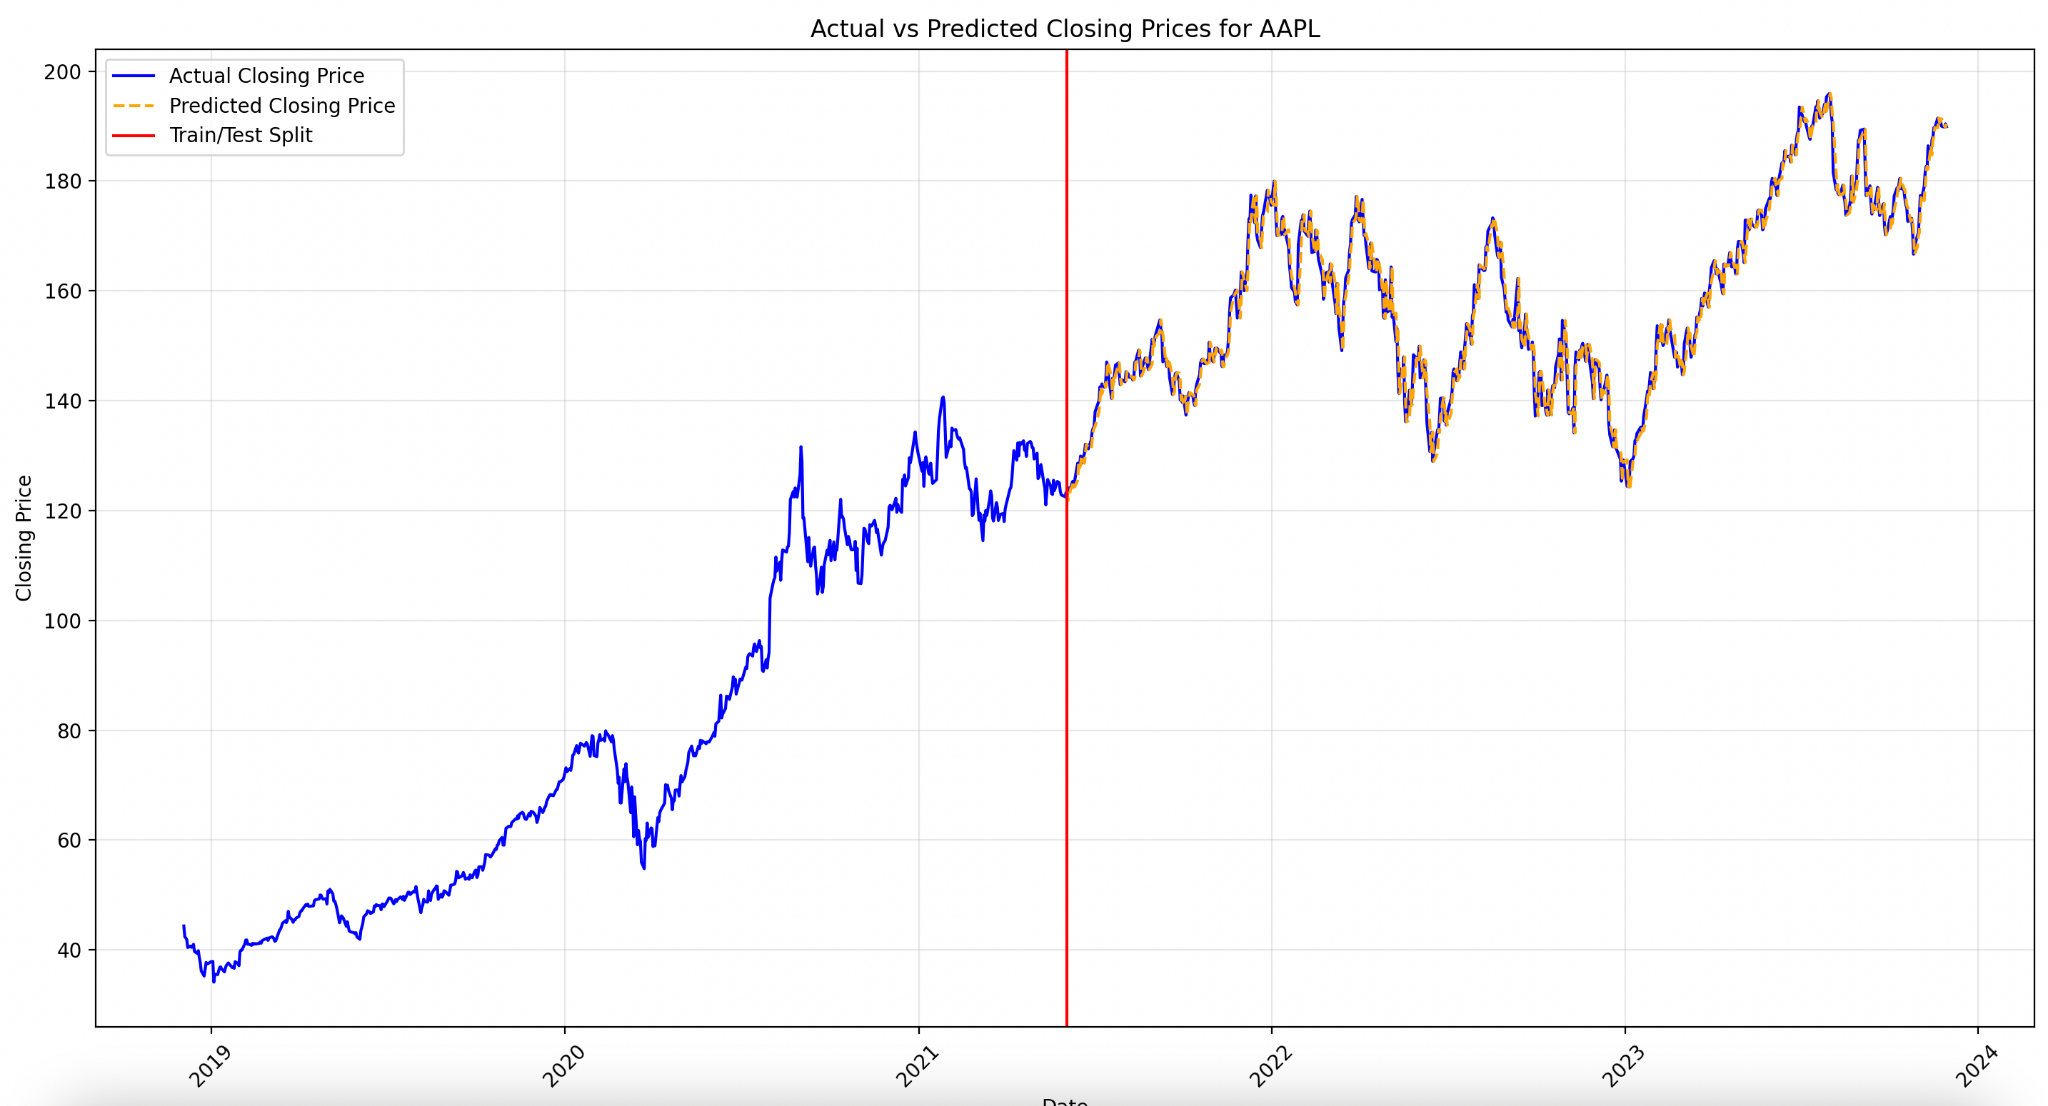


- The blue line represents actual AAPL closing prices.
- The orange dashed line shows TD-predicted closing prices.
- The red vertical line represents the train/test split.

Observation: The predictions closely match the actual values, indicating that the TD model learns stock price movements effectively.
<br>

2. Optimized DP Trading Strategy:
<br>

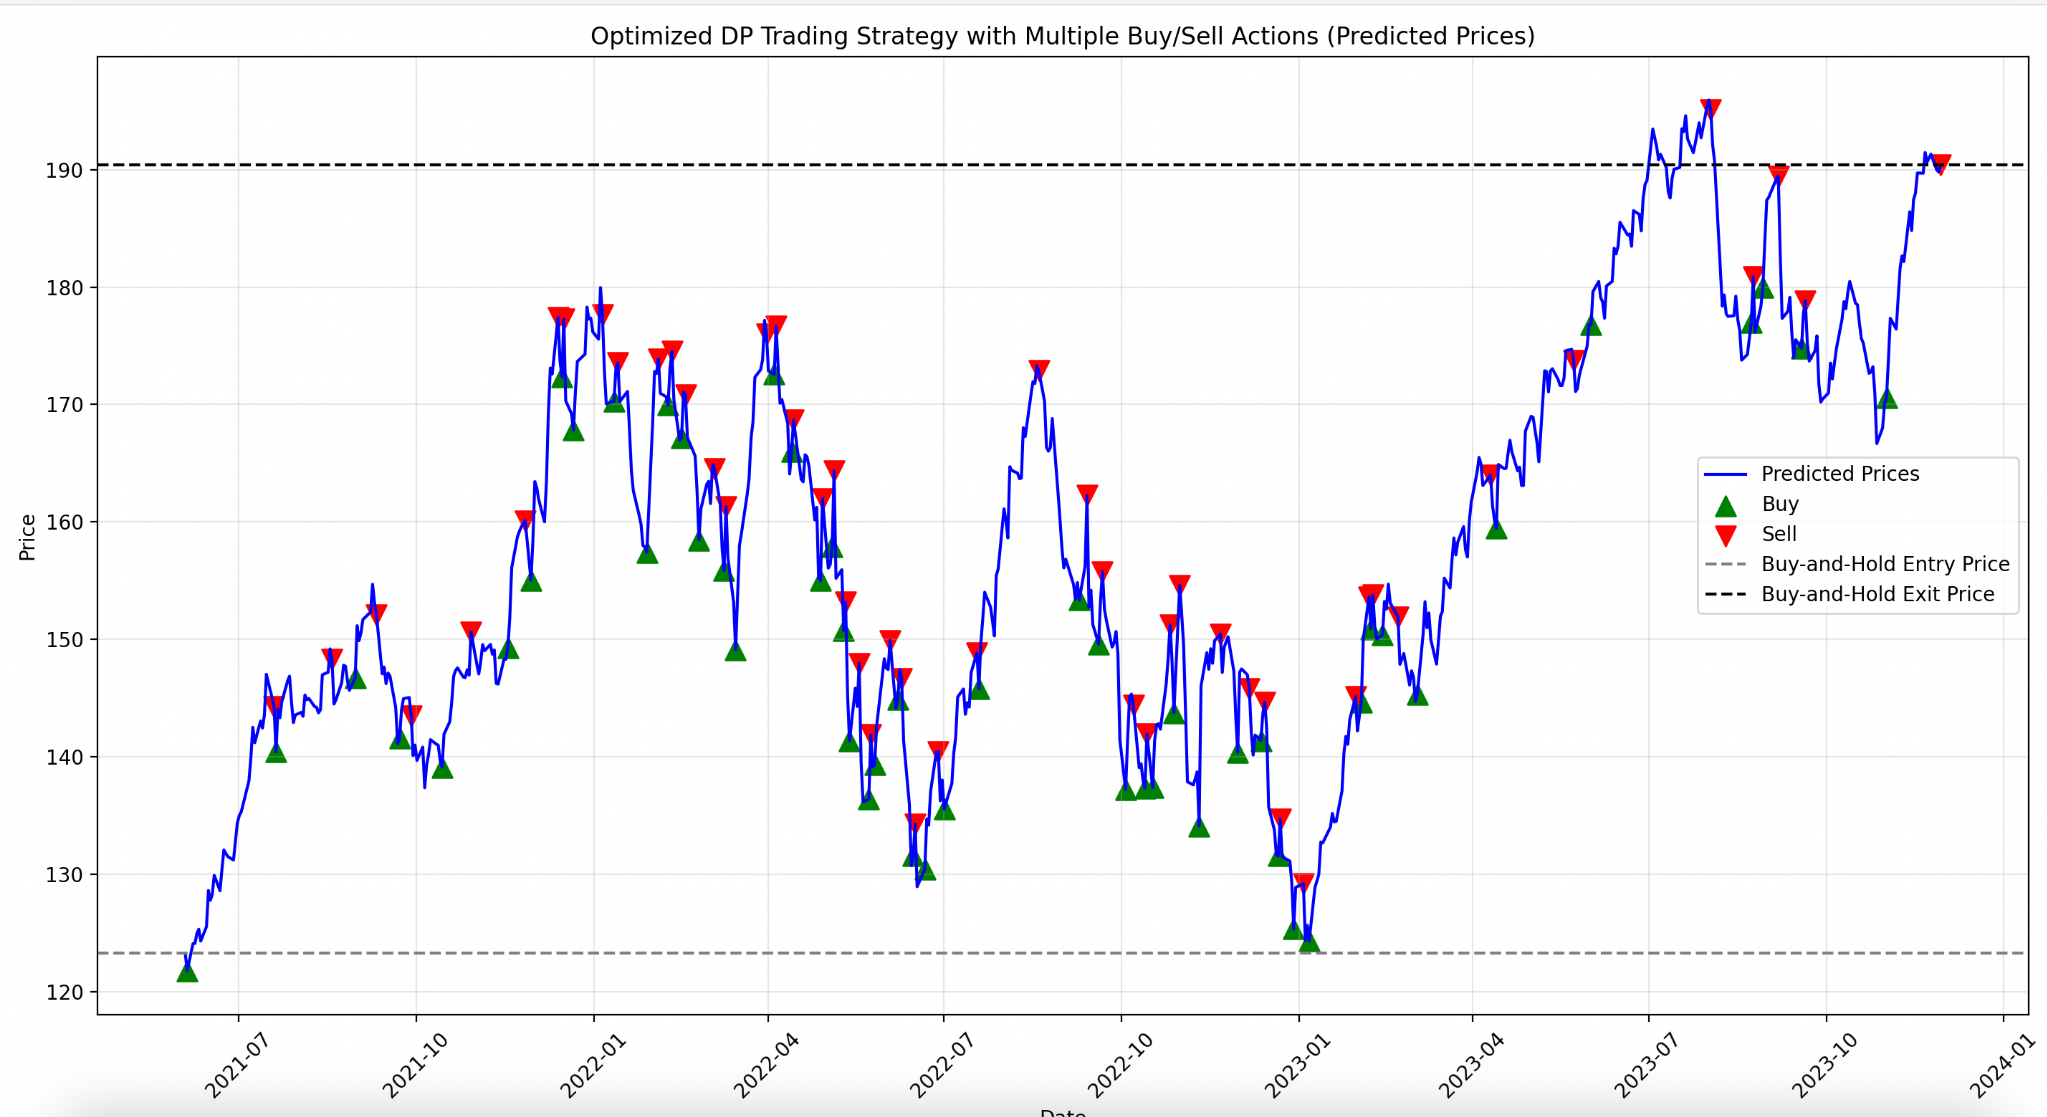


- The blue line represents predicted prices.
- Green triangles mark buy signals, while red inverted triangles mark sell signals.
- Dashed horizontal lines represent the buy-and-hold entry and exit prices.

Observation: The DP model executes multiple buy/sell trades based on price movements, unlike the static Buy-and-Hold approach.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.


### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   


### Future work
Looking at the limitations and/or the toughest parts of the problem and/or the situations where the algorithm(s) did the worst... is there something you'd like to try to make these better.

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
